In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, 'Light/')

from Light import Spectra, Epsilon_ExpClass #For optical response with the pygdm package 

In [2]:
Au = Epsilon_ExpClass.Au()
eps_r = Au.n_real
eps_i = Au.n_imag

wl = Au.wl

eps = complex(1,0)*eps_r + complex(0,1)*eps_i

alpha = 4 * np.pi * (10E-9) *( ( eps - 1 ) / ( eps + 2 ) )

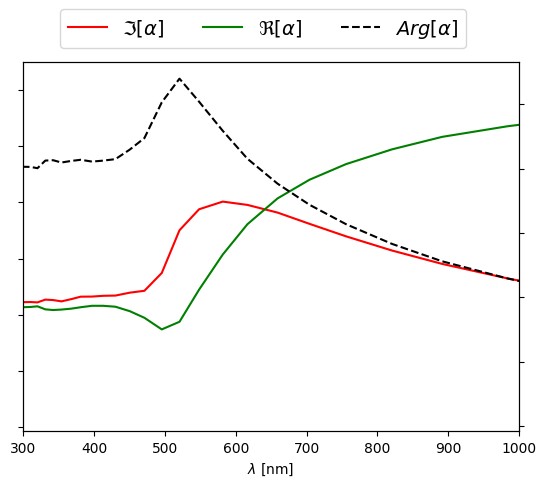

In [3]:
fig, ax = plt.subplots()

ax.plot(wl, np.imag(alpha), color='r', linestyle = '-', label = r"$\Im[\alpha]$")
ax.plot(wl, np.real(alpha), color='g', linestyle = '-', label = r"$\Re[\alpha]$")  
ax2 = ax.twinx()
ax2.plot(wl, np.angle(alpha), color='k', linestyle='--', label = r"$Arg[\alpha]$")
ax.set_xlim(300,1000)

ax.set_yticklabels([])
ax2.set_yticklabels([])
ax.set_xlabel(r'$\lambda$ [nm]')
fig.legend( ncol = 3, bbox_to_anchor=(0.5, 1.01), loc='upper center', fontsize = 14)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from PIL import Image

## Polarisation

Circularly polarised light is a special form of electromagnetic radiation in which the electric field vector rotates in a helical manner as the wave propagates. Unlike linearly polarised light, where the electric field oscillates in a fixed plane, circularly polarised light's electric field traces a spiral in space.

### How It Works
The electric field components in the  x- and y-directions have equal magnitudes but oscillate with a phase difference of 
#### $\pm \frac{\pi}{2}$​
This phase shift causes the resultant electric field vector to continuously rotate in a circular motion.

We'll start by visualising our plane waves propagating and observe how their polarisation vector evolves.

## Task

### Can you edit the code to create circular and elliptically polarised light? 
### How does this function? 
### Can you change the direction of the polarisation ellipse?

In [5]:
#Because people often complain that I neglect units in favour of looking at the behaviour of functions
#I do not want you to adopt my bad habits
#Therefore, we will pre-define all field parameters w.r.t physical constants and observables 

c = 3e8  # Speed of light (m/s)
lambda_ = 500e-9  # Wavelength (m)
k = 2 * np.pi / lambda_  # Wave number
omega = c * k  # Angular frequency
time = np.linspace(-4*np.pi / omega, 4 * np.pi / omega, 201)  # Time array w.r.t angular frequency
x = np.linspace(-5 * lambda_, 5 * lambda_, 201)  # Space array

X,T = np.meshgrid(x, time)
# Define electric and magnetic field components
E0 = 1  #Electric-field amplitude in arbitrary units

E = E0 * np.exp(complex(0, -1) * (( time * omega) - (k * x)   ))

E_vec = np.array([E*complex(1,0), E*complex(0,0)], dtype = np.complex64)

C:\Users\jones\AppData\Local\Temp\ipykernel_32600\3286769559.py:32: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point.set_data(ex_val, ey_val)
C:\Users\jones\AppData\Local\Temp\ipykernel_32600\3286769559.py:32: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point.set_data(ex_val, ey_val)


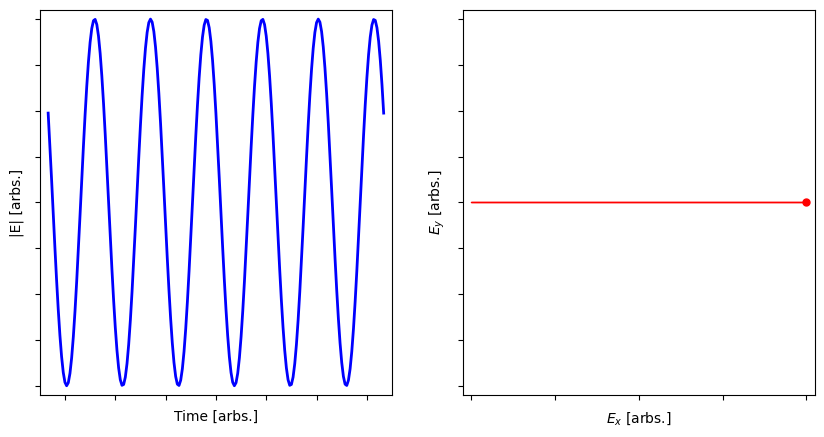

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
ax1, ax2 = axes.flatten()

ax1.set_xlim(1.05*-4*np.pi / omega, 1.05*4*np.pi / omega,)
ax1.set_ylim(-1.05*E0, 1.05*E0)
ax2.set_xlim(-1.05*E0, 1.05*E0)
ax2.set_ylim(-1.05*E0, 1.05*E0)
ax1.set_xlabel("Time [arbs.]")
ax1.set_ylabel("|E| [arbs.]")
ax2.set_xlabel(r"$E_{x}$ [arbs.]")
ax2.set_ylabel(r"$E_{y}$ [arbs.]")

ax1.set_xticklabels([])
ax1.set_yticklabels([])

ax2.set_xticklabels([])
ax2.set_yticklabels([])

line1, = ax1.plot([], [], 'b-', lw=2)
point, = ax2.plot([], [], 'ro', markersize=5)
trail, = ax2.plot([], [], 'r-', lw=1)
trail_data = []

# Animation function
def update(frame):
    line1.set_data(time, np.real( np.exp(complex(0,-1)*frame)  * E ))
    
    ex_val = np.real(E_vec[0][frame])
    ey_val = np.real(E_vec[1][frame])
    trail_data.append([ex_val, ey_val])
    trail.set_data(*zip(*trail_data))
    point.set_data(ex_val, ey_val)
    
    return line1, point, trail

ani = animation.FuncAnimation(fig, update, frames=len(time), interval=10, blit=True)

# Save as GIF
ani.save("Polarisation.gif", writer="pillow", fps=20)

plt.show()


In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [33]:
v1 = np.array([1, complex(0,-1)])

time = np.linspace(-5*np.pi, 5*np.pi, 501)

field = np.array( [np.exp(complex(0,1)*t) * v1 for t in time] )

## $$ field =  e^{-i\omega t} \left[ 1, -i \right] $$

## $$ e^{-i\omega t} = i sin(\omega t) + cos(\omega t) $$

## $$ \left[ cos(\omega t), sin(\omega t) \right] $$

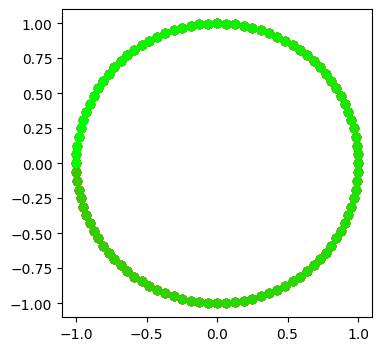

In [34]:
fig,ax = plt.subplots()
fig.set_size_inches(4,4)
for i,t in enumerate(time):
    ax.scatter(np.real(field[:,0][i]), np.real(field[:,1][i]), 
               color = [1 - i/len(time), 
                        i/len(time),
                        0 ] 
               #color = [ r, g, b, alpha]
               )


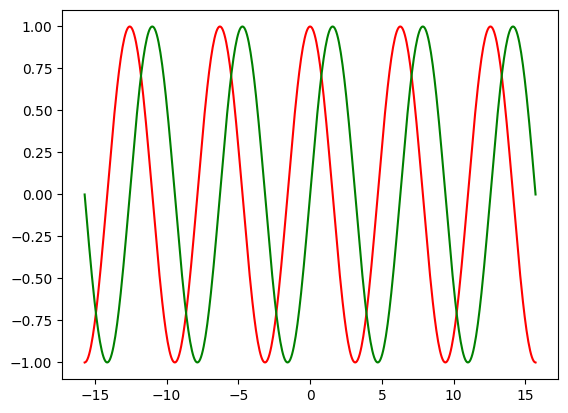

In [35]:
fig, ax = plt.subplots()

ax.plot(time, np.real(field[:,0]), color='r', linestyle = '-', label = r"$E_{x}$")


ax.plot(time, np.real(field[:,1]), color='g', linestyle = '-', label = r"$E_{y}$")

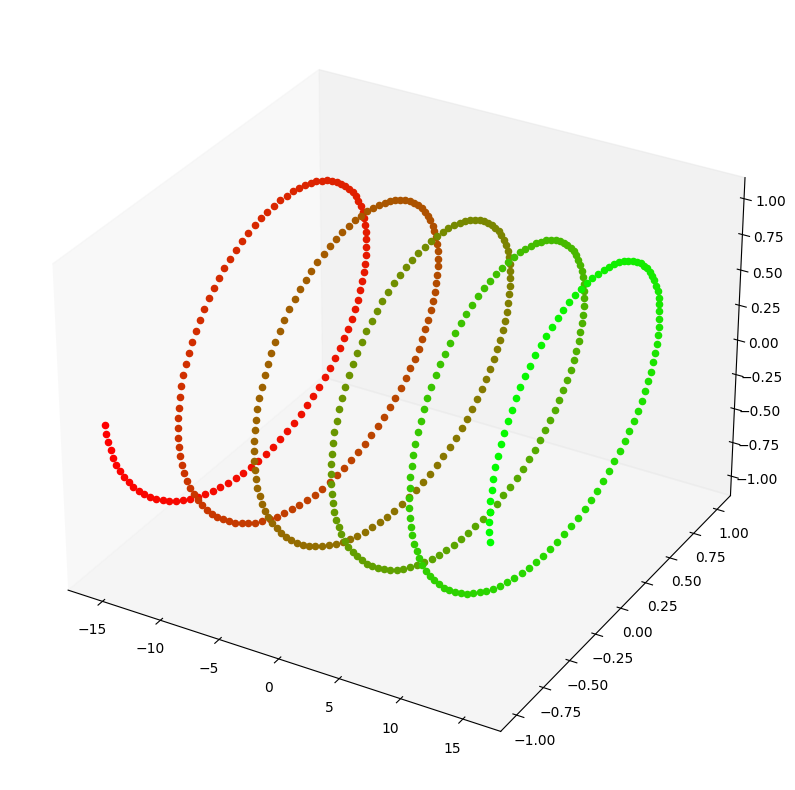

In [44]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')


for i,t in enumerate(time):
    ax.scatter(time[i],
            np.real(field[:,0][i]),
            np.real(field[:,1][i]),
            color = [ 1 - i/len(time), i/len(time), 0 ] )

ax.grid(False)